<a href="https://colab.research.google.com/github/joelvalerian/simple-autoencoder-anomaly-detection/blob/main/Statistics_Test_for_DVH_and_Radiomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import mannwhitneyu
import csv

In [2]:
# System configuration
filepath = '/content/drive/MyDrive/Universitas Indonesia/Akademik/Skripsi/Data/'

In [3]:
# Data index filter
data_skip = [13, 23, 31]
anomali_skip = [1, 5 , 6, 8]

In [4]:
# Import DVH data
# Option 1 (normal data)
data = pd.read_csv(filepath + 'data_dvh.csv').to_numpy().astype(np.float32)
anomali = pd.read_csv(filepath + 'anomali_dvh.csv').to_numpy().astype(np.float32)
features = ['Body_D2', 'Body_D50', 'Body_D98', 'LungL_D2', 'LungL_D50', 'LungL_D98', 'PTV_D2', 'PTV_D50', 'PTV_D98', 'LungR_D2', 'LungR_D50', 'LungR_D98', 'SpinalCord_D2', 'SpinalCord_D50', 'SpinalCord_D98', 'Heart_D2', 'Heart_D50', 'Heart_D98']

# Option 2 (refined data)
# data = pd.read_csv(filepath + 'data_dvh.csv', skiprows=data_skip).to_numpy().astype(np.float32)
# anomali = pd.read_csv(filepath + 'anomali_dvh.csv', skiprows=anomali_skip).to_numpy().astype(np.float32)
# features = ['Body_D2', 'Body_D50', 'Body_D98', 'LungL_D2', 'LungL_D50', 'LungL_D98', 'PTV_D2', 'PTV_D50', 'PTV_D98', 'LungR_D2', 'LungR_D50', 'LungR_D98', 'SpinalCord_D2', 'SpinalCord_D50', 'SpinalCord_D98', 'Heart_D2', 'Heart_D50', 'Heart_D98']

In [5]:
# Extract data shape
data_n_samples, data_n_features = data.shape
anomali_n_samples, anomali_n_features = anomali.shape

# Print data shape
print(data.shape)
print(anomali.shape)

(34, 18)
(10, 18)


In [6]:
# Count and calculate statistically significant different feature distribution between normal (optimal) and anomaly (suboptimal) data
count = 0
dvh_statistics = []
for n in range(data_n_features):
  stat, p = mannwhitneyu(data[:, n], anomali[:,n])
  if p < 0.05:
    print(f'{features[n]} {p:.4f} || Data: {np.mean(data[:,n]):.4f}±{np.std(data[:,n]):.4f} Anom: {np.mean(anomali[:,n]):.4f}±{np.std(anomali[:,n]):.4f}')
    dvh_statistics.append([features[n], np.mean(data[:,n]), np.std(data[:,n]), np.mean(anomali[:,n]), np.std(anomali[:,n]), p])
    count += 1
print(f'{count} out of {data_n_features} different significantly')

Body_D50 0.0000 || Data: 0.0087±0.0078 Anom: 0.0628±0.0091
Body_D98 0.0000 || Data: 0.0002±0.0001 Anom: 0.0025±0.0004
LungL_D2 0.0275 || Data: 0.4981±0.3679 Anom: 0.7978±0.4006
PTV_D2 0.0024 || Data: 1.0463±0.0152 Anom: 1.2432±0.2941
LungR_D98 0.0019 || Data: 0.0157±0.0212 Anom: 0.0044±0.0027
SpinalCord_D50 0.0013 || Data: 0.0784±0.1367 Anom: 0.1354±0.1008
SpinalCord_D98 0.0313 || Data: 0.0039±0.0067 Anom: 0.0038±0.0015
Heart_D50 0.0226 || Data: 0.0843±0.1042 Anom: 0.1255±0.1428
Heart_D98 0.0226 || Data: 0.0154±0.0265 Anom: 0.0056±0.0068
9 out of 18 different significantly


In [7]:
# Import radiomics data
# Option 1 (normal data)
data = pd.read_csv(filepath + 'data_radiomics_selected.csv')
anomali = pd.read_csv(filepath + 'anomali_radiomics_selected.csv')

# Option 2 (refined data)
# data = pd.read_csv(filepath + 'data_radiomics_selected.csv', skiprows=data_skip)
# anomali = pd.read_csv(filepath + 'anomali_radiomics_selected.csv', skiprows=anomali_skip)

In [8]:
# Convert data type
features = list(data.columns)
data = data.to_numpy().astype(np.float32)
anomali = anomali.to_numpy().astype(np.float32)

# Extract data shape
data_n_samples, data_n_features = data.shape
anomali_n_samples, anomali_n_features = anomali.shape

# Print data shape
print(data.shape)
print(anomali.shape)

(34, 161)
(10, 161)


In [9]:
# Count and calculate statistically significant different feature distribution between normal (optimal) and anomaly (suboptimal) data
count = 0
radiomics_statistics = []
for n in range(data_n_features):
  stat, p = mannwhitneyu(data[:, n], anomali[:,n])
  if p < 0.05:
    print(f'{features[n]} {p:.4f} || Data: {np.mean(data[:,n]):.4f}±{np.std(data[:,n]):.4f} Anom: {np.mean(anomali[:,n]):.4f}±{np.std(anomali[:,n]):.4f}')
    radiomics_statistics.append([features[n], np.mean(data[:,n]), np.std(data[:,n]), np.mean(anomali[:,n]), np.std(anomali[:,n]), p])
    count += 1
print(f'{count} out of {data_n_features} different significantly')

InterquartileRange_PTV 0.0014 || Data: 0.0440±0.0807 Anom: 0.0780±0.0363
Kurtosis_PTV 0.0354 || Data: 6.5241±7.5986 Anom: 3.6475±0.8557
Maximum_LungL 0.0377 || Data: 0.6710±0.3194 Anom: 0.9148±0.3945
MeanAbsoluteDeviation_PTV 0.0008 || Data: 0.0265±0.0461 Anom: 0.0460±0.0212
Range_LungL 0.0313 || Data: 0.6603±0.3155 Anom: 0.8787±0.3674
Range_PTV 0.0077 || Data: 0.2194±0.1698 Anom: 0.3682±0.1866
RobustMeanAbsoluteDeviation_PTV 0.0012 || Data: 0.0188±0.0357 Anom: 0.0325±0.0151
Skewness_PTV 0.0097 || Data: -1.2568±0.8718 Anom: -0.5789±0.5894
Variance_PTV 0.0011 || Data: 0.0041±0.0188 Anom: 0.0040±0.0030
DependenceNonUniformity_SpinalCord 0.0275 || Data: 168.9427±71.2979 Anom: 123.1511±49.2149
GrayLevelNonUniformity_SpinalCord 0.0185 || Data: 2418.1177±907.2996 Anom: 1753.6000±552.5427
11 out of 161 different significantly


In [10]:
# Export statistics test result
with open('dvh_statistics.csv', 'w', ) as csv_file:
  csv_writer = csv.writer(csv_file, delimiter=',')
  for i in range(len(dvh_statistics)):
    csv_writer.writerow(dvh_statistics[i])

with open('radiomics_statistics.csv', 'w', ) as csv_file:
  csv_writer = csv.writer(csv_file, delimiter=',')
  for i in range(len(radiomics_statistics)):
    csv_writer.writerow(radiomics_statistics[i])

print('Data exported!')

Data exported!


In [11]:
# Import CI and HI data
# Option 1 (normal data)
data = pd.read_csv(filepath + 'data_metric.csv').to_numpy().astype(np.float32)
anomali = pd.read_csv(filepath + 'anomali_metric.csv').to_numpy().astype(np.float32)

# Option 2 (refined data)
# data = pd.read_csv(filepath + 'data_metric.csv', skiprows=data_skip).to_numpy().astype(np.float32)
# anomali = pd.read_csv(filepath + 'anomali_metric.csv', skiprows=anomali_skip).to_numpy().astype(np.float32)

In [12]:
# Extract data shape
data_n_samples, data_n_features = data.shape
anomali_n_samples, anomali_n_features = anomali.shape

# Print data shape
print(data.shape)
print(anomali.shape)

(34, 2)
(10, 2)


In [13]:
# Count and calculate statistically significant different feature distribution between normal (optimal) and anomaly (suboptimal) data
metric_statistics = []
features = ['CI', 'HI']

for n in range(data_n_features):
  stat, p = mannwhitneyu(data[:, n], anomali[:,n])
  print(f'{features[n]} {p:.4f} || Data: {np.mean(data[:,n]):.4f}±{np.std(data[:,n]):.4f} Anom: {np.mean(anomali[:,n]):.4f}±{np.std(anomali[:,n]):.4f}')
  metric_statistics.append([features[n], np.mean(data[:,n]), np.std(data[:,n]), np.mean(anomali[:,n]), np.std(anomali[:,n]), p])

CI 0.2552 || Data: 1.2023±0.3245 Anom: 1.4044±1.1540
HI 0.0000 || Data: 0.1221±0.1793 Anom: 0.3417±0.0778


In [14]:
# Export statistics test result
with open('metric_statistics.csv', 'w', ) as csv_file:
  csv_writer = csv.writer(csv_file, delimiter=',')
  for i in range(len(metric_statistics)):
    csv_writer.writerow(metric_statistics[i])

print('Data exported!')

Data exported!


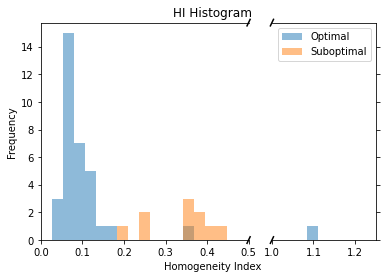

In [15]:
# Plot CI and HI metrics
# HI histogram with sliced axis
bins = np.linspace(0, 0.5, 20)
bins2 = np.linspace(1, 1.25, 10)

f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w', gridspec_kw={'width_ratios': [2, 1]})

ax.hist(data[:,1], bins, alpha=0.5, label='Optimal')
ax.hist(anomali[:,1], bins, alpha=0.5, label='Suboptimal')
ax2.hist(data[:,1], bins2, alpha=0.5, label='Optimal')
ax2.hist(anomali[:,1], bins, alpha=0.5, label='Suboptimal')

ax.set_xlim(0,0.5)
ax2.set_xlim(1,1.25)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.yaxis.tick_right()

d = .015
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d/2,1+d/2), (-d,+d), **kwargs)
ax.plot((1-d/2,1+d/2),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

f.subplots_adjust(wspace=0.15)

ax.set_title('HI Histogram', x=0.75+0.075)
ax2.legend()
ax.set_xlabel('Homogeneity Index')
ax.set_ylabel('Frequency')
ax.xaxis.set_label_coords(0.75+0.075, -0.1)
plt.show()

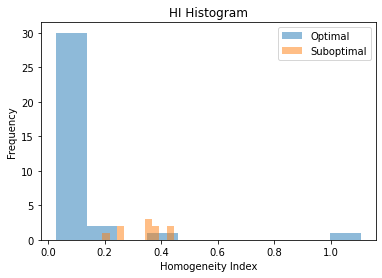

In [16]:
# Normal HI histogram
f3, ax3 = plt.subplots(facecolor='w')
ax3.hist(data[:,1], alpha=0.5, label='Optimal')
ax3.hist(anomali[:,1], alpha=0.5, label='Suboptimal')
ax3.set_title('HI Histogram')
ax3.legend()
ax3.set_xlabel('Homogeneity Index')
ax3.set_ylabel('Frequency')
plt.show()
f3.savefig('11_2.png', dpi=1200)

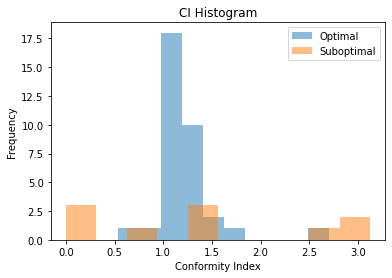

In [17]:
# Normal CI histogram
f4, ax4 = plt.subplots(facecolor='w')
ax4.hist(data[:,0], alpha=0.5, label='Optimal')
ax4.hist(anomali[:,0], alpha=0.5, label='Suboptimal')
ax4.set_title('CI Histogram')
ax4.legend()
ax4.set_xlabel('Conformity Index')
ax4.set_ylabel('Frequency')
plt.show()
f4.savefig('11_1.png', dpi=1200)